In [ ]:
#all the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import normalize
import gensim.downloader as api
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [9]:
#downloading the embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2024-09-28 17:42:03--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-28 17:42:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-28 17:42:04--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [1]:
model = api.load("word2vec-google-news-300")
glove_model = api.load("glove-wiki-gigaword-100")

In [11]:
#conversion between the models to apply to other methods
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

<ipython-input-11-930b11f16266>:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [1]:
# Download stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

# Sample dataset
search_queries = [
    "buy laptop online",
    "cheap laptops for sale",
    "best gaming laptop",
    "online shopping for electronics",
    "buy smartphone online",
    "cheap mobile phones",
    "best budget smartphone",
    "latest smartphone models",
    "buy books online",
    "top books to read",
    "best fantasy books"
]

corpus = [] #creating the corpus
for query in search_queries:
    review = query.lower()
    review = review.split()
    review = [word for word in review if word not in set(sw)]
    review = ' '.join(review)
    corpus.append(review)

#vectorization of BOW
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(corpus)
X_bow_dense = X_bow.toarray()
df_bow = pd.DataFrame(X_bow_dense, columns=vectorizer_bow.get_feature_names_out())
df_bow.insert(0, 'Index', range(len(corpus)))
print("Bag of Words (BOW) Table:")
print(df_bow.to_string(index=False))

#tf-idf representation
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus)
X_tfidf_dense = X_tfidf.toarray()
df_tfidf = pd.DataFrame(X_tfidf_dense, columns=vectorizer_tfidf.get_feature_names_out())
df_tfidf.insert(0, 'Index', range(len(corpus)))
print("\nTF-IDF Table:")
print(df_tfidf.to_string(index=False))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Bag of Words (BOW) Table:
 Index  best  books  budget  buy  cheap  electronics  fantasy  gaming  laptop  laptops  latest  mobile  models  online  phones  read  sale  shopping  smartphone  top
     0     0      0       0    1      0            0        0       0       1        0       0       0       0       1       0     0     0         0           0    0
     1     0      0       0    0      1            0        0       0       0        1       0       0       0       0       0     0     1         0           0    0
     2     1      0       0    0      0            0        0       1       1        0       0       0       0       0       0     0     0         0           0    0
     3     0      0       0    0      0            1        0       0       0        0       0       0       0       1       0     0     0         1           0    0
     4     0      0       0    1      0            0        0       0       0        0       0       0       0       1       0     0     0      

In [10]:
#similar suggestions from the word2vec model
example_word = "computer"
similar_words = model.most_similar(example_word, topn=10)
print(f"Top 10 words similar to '{example_word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Top 10 words similar to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082
technician_Leonard_Luchko: 0.5663
mainframes_minicomputers: 0.5618
laptop_computers: 0.5585
PC: 0.5540
maker_Dell_DELL.O: 0.5519


In [4]:
#embedding vector for the word "computer"
word = 'computer'
# Get the embedding vector for the word
embedding_vector = model[word]

# Display the embedding vector
print(f"Embedding vector for the word '{word}':\n")
print(f"{embedding_vector[0:11]} ..... {embedding_vector[-10:]}") #here we have displayed only the first 10 and last 10 values, the actual dimension is 300

Embedding vector for the word 'computer':

[ 0.10742188 -0.20117188  0.12304688  0.21191406 -0.09130859  0.21679688
 -0.13183594  0.08300781  0.20214844  0.04785156  0.03662109] ..... [-0.38085938  0.17089844  0.05664062 -0.10449219  0.13867188 -0.15722656
  0.00323486 -0.0480957  -0.24804688 -0.06201172]


In [27]:
# sample corpus
corpus = [
    "I like pathway",
    "I like NLP",
    "I enjoy pathway",
    "deep learning is fun",
    "NLP is amazing",
    "pathway is fun"
]
window_size = 2 #window size
words = set([word for sentence in corpus for word in sentence.split()])
vocab = list(words)
vocab_size = len(vocab)
word_index = {word: i for i, word in enumerate(vocab)}
co_occurrence_matrix = np.zeros((vocab_size, vocab_size))

# build cooccurence matrix
for sentence in corpus:
    tokens = sentence.split()
    for i, word in enumerate(tokens):
        word_id = word_index[word]
        start = max(i - window_size, 0)
        end = min(i + window_size + 1, len(tokens))
        for j in range(start, end):
            if i != j:
                context_word_id = word_index[tokens[j]]
                co_occurrence_matrix[word_id][context_word_id] += 1
#displaying in a dataframe
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=vocab, columns=vocab)
print("Co-occurrence Matrix:")
print(co_occurrence_df)


Co-occurrence Matrix:
          learning  deep  pathway    I  like  NLP  amazing  enjoy  fun   is
learning       0.0   1.0      0.0  0.0   0.0  0.0      0.0    0.0  1.0  1.0
deep           1.0   0.0      0.0  0.0   0.0  0.0      0.0    0.0  0.0  1.0
pathway        0.0   0.0      0.0  2.0   1.0  0.0      0.0    1.0  1.0  1.0
I              0.0   0.0      2.0  0.0   2.0  1.0      0.0    1.0  0.0  0.0
like           0.0   0.0      1.0  2.0   0.0  1.0      0.0    0.0  0.0  0.0
NLP            0.0   0.0      0.0  1.0   1.0  0.0      1.0    0.0  0.0  1.0
amazing        0.0   0.0      0.0  0.0   0.0  1.0      0.0    0.0  0.0  1.0
enjoy          0.0   0.0      1.0  1.0   0.0  0.0      0.0    0.0  0.0  0.0
fun            1.0   0.0      1.0  0.0   0.0  0.0      0.0    0.0  0.0  2.0
is             1.0   1.0      1.0  0.0   0.0  1.0      1.0    0.0  2.0  0.0


In [15]:
# getting similar suggestions from the glove model
def find_similar_words(word, model, topn=10):
    word_vector = model[word]
    similarities = {}
    for other_word, other_vector in model.items():
        if other_word != word:
            similarity = cosine_similarity([word_vector], [other_vector])[0][0]
            similarities[other_word] = similarity
    similar_words = sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:topn]
    return similar_words
example_word = "lovely"
similar_words_glove = find_similar_words(example_word, glove_model, topn=10)
print(f"Top 10 words similar to '{example_word}' (GloVe):")
for word, similarity in similar_words_glove:
    print(f"{word}: {similarity:.4f}")


Top 10 words similar to 'lovely' (GloVe):
beautiful: 0.8909
gorgeous: 0.8785
wonderful: 0.8121
charming: 0.8051
delightful: 0.7723
elegant: 0.7250
fabulous: 0.7017
wonderfully: 0.6976
nice: 0.6888
cute: 0.6816


In [9]:
#analogy representation in code
result = model.most_similar(positive=['king', 'woman'], negative=['man'])
for i in result:
    print(f"{i[0]:<{20}} {i[1]:.6f}")

queen                0.71182
monarch              0.61897
princess             0.59024
crown_prince         0.54995
prince               0.53773
kings                0.52368
Queen_Consort        0.52359
queens               0.51811
sultan               0.50986
monarchy             0.50874


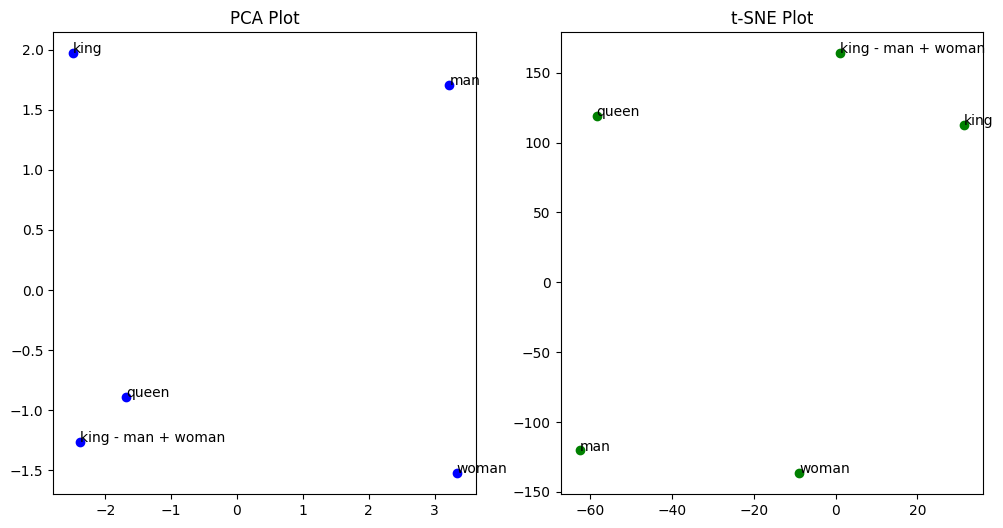

In [12]:
#plot pca and tsne to display the analogies for the vectors
def load_glove_model(glove_file):
    model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            model[word] = embedding
    return model

glove_file = 'glove.6B.100d.txt'
glove_model = load_glove_model(glove_file)

words = ['king', 'queen', 'man', 'woman']
king = glove_model['king']
queen = glove_model['queen']
man = glove_model['man']
woman = glove_model['woman']

result_vector = king - man + woman

cos_sim = cosine_similarity([result_vector], [queen])[0][0]
print(f"Cosine Similarity (king - man + woman vs. queen): {cos_sim}")

vectors = np.vstack([king, queen, man, woman, result_vector])
words_with_result = words + ['king - man + woman']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

tsne = TSNE(n_components=2, perplexity=2, random_state=42)
tsne_result = tsne.fit_transform(vectors)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(pca_result[:, 0], pca_result[:, 1], color='blue')
for i, word in enumerate(words_with_result):
    ax1.annotate(word, (pca_result[i, 0], pca_result[i, 1]))
ax1.set_title('PCA Plot')

ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], color='green')
for i, word in enumerate(words_with_result):
    ax2.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]))
ax2.set_title('t-SNE Plot')

plt.show()
